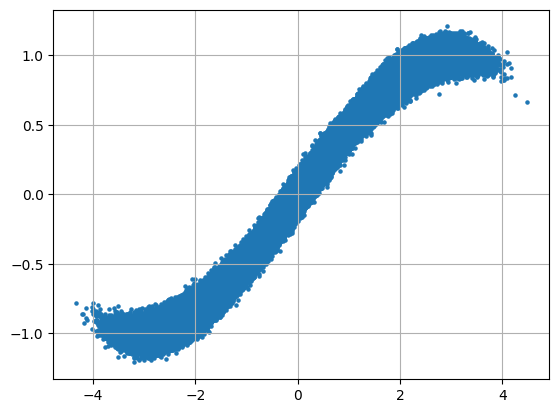

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression

ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2023_MCD3735A/Módulo 6 - Discretización de variables/'
df=pd.read_csv(ruta+'dataKmeans.csv')
plt.scatter(df.x,df.y,s=5)
plt.grid()

In [6]:
#@title Discretización
k=4
discretizador=DecisionTreeRegressor(max_leaf_nodes=k) # max_depth=2
discretizador.fit(df[['x']],df.y)
df['tree']=discretizador.predict(df[['x']])
df.groupby('tree')['x'].mean()

tree
-0.823961   -2.022928
-0.198411   -0.404289
 0.195374    0.397713
 0.824734    2.024186
Name: x, dtype: float64

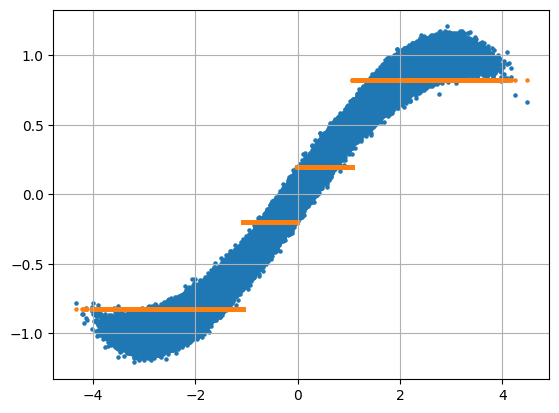

In [7]:
plt.scatter(df.x,df.y,s=5)
plt.scatter(df.x,df['tree'],s=5)
plt.grid()

In [8]:
#@title Regresión con los valores discretizados
x=df.groupby('tree')['x'].mean().values
y=df.groupby('tree')['y'].mean().values
x,y

(array([-2.02292751, -0.40428928,  0.39771337,  2.02418577]),
 array([-0.82396068, -0.19841147,  0.19537379,  0.82473443]))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


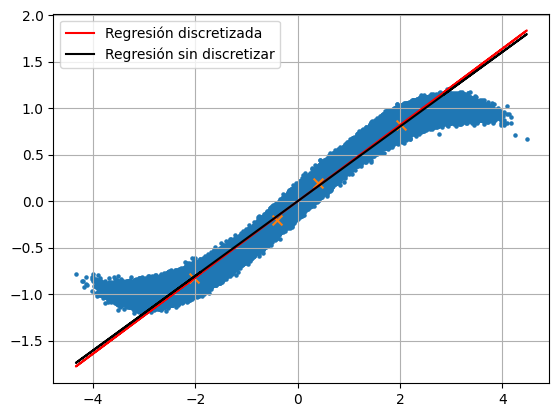

In [11]:
lin_tree=LinearRegression()
lin_tree.fit(x.reshape(-1,1),y)
plt.scatter(df.x,df.y,s=5)
plt.plot(df.x,lin_tree.predict(df[['x']]),'r',label='Regresión discretizada')
plt.scatter(x,y,marker='x',s=50)

lin=LinearRegression()
lin.fit(df[['x']],df['y'])
plt.plot(df['x'],lin.predict(df[['x']]),'k',label='Regresión sin discretizar')
plt.legend()
plt.grid()

# Discretización mediante Árboles de decisión con un modelo lineal

In [15]:
# Paso 1. Definición de 's'
s=np.random.uniform(df.x.min(),df.x.max())

# Paso 2. Selección de los conjuntos
X1=df.x[df.x<s].values.reshape(-1,1)
X2=df.x[df.x>=s].values.reshape(-1,1)

Y1=df.y[df.x<s]
Y2=df.y[df.x>=s]

# Paso 3. Todavía no
lin_1=LinearRegression()
lin_1.fit(X1,Y1)

lin_2=LinearRegression()
lin_2.fit(X2,Y2)

def distancia(yi,predict):
  return np.abs(yi-predict).sum()
d=distancia(Y1,lin_1.predict(X1))+distancia(Y2,lin_2.predict(X2))
s,d

(3.4101930056553913, 98313.87457567593)